<b><font size=20, color='#A020F0'>Pandas

Hannah Zanowski<br>
9/30/24<br>

#### <span style="color:green">Learning Goals</span>
By the end of this notebook you will
1. Become familiar with the basic data structures in Pandas and how to create them
2. Practice reading in data and doing computations on dataframes

#### Resources
[Pandas website](https://pandas.pydata.org/)<br>
[Pandas Documentation](https://pandas.pydata.org/docs/)<br>
[Pandas API reference](https://pandas.pydata.org/docs/reference/index.html#)<br>

# A little about pandas

Pandas is a glorious library for working with tabular data. It relies on high-level data structures and comes with a huge set of useful analysis tools, including easily reading in .txt and .csv files. Pandas uses label-based indexing that makes working with data much more streamlined and easier to understand.

Let's begin by importing pandas (and a few of our other favorites):

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

---

## 1. Creating a pandas series
[Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) objects are a core data structure in pandas. A series is much like a 1D numpy ndarray, except that there is a labeled index associated with the values in the series. Like all things python, there are many ways to [create a pandas series](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#series). Below, we'll create one from scratch:

In [2]:
#Create a pandas series from scratch
#data is the data in the series; index is the name via which we access the data--this can be numerical
animal_counts=pd.Series(data=[10,8,22,1,17,6,3,0], 
                      index=['Dog','Cat','Bird','Alligator',
                             'Giraffe','Lion','Bear','Penguin'])

In [3]:
animal_counts

Dog          10
Cat           8
Bird         22
Alligator     1
Giraffe      17
Lion          6
Bear          3
Penguin       0
dtype: int64

## 2. Working with series

### Accessing the data
You can access series data by using [.loc[]](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) or [.iloc[]](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html). The first allows you to retrieve a value based on the named index, and the second allows you to retrieve a value based on an integer index (like we use in numpy arrays)

In [4]:
animal_counts.loc['Cat']

8

In [5]:
animal_counts.iloc[1]

8

If you want to access _only_ the data:

In [6]:
animal_counts.values

array([10,  8, 22,  1, 17,  6,  3,  0])

If you want to access only the index:

In [7]:
animal_counts.index

Index(['Dog', 'Cat', 'Bird', 'Alligator', 'Giraffe', 'Lion', 'Bear',
       'Penguin'],
      dtype='object')

### Doing computations
You can apply most numpy functions to pandas series without any issue. The best part is that your index will be preserved!

In [8]:
animal_counts.shape

(8,)

In [10]:
#Standardize animal_counts
(animal_counts-np.mean(animal_counts))/np.std(animal_counts,ddof=1)

Dog          0.209320
Cat         -0.048305
Bird         1.755067
Alligator   -0.949990
Giraffe      1.111006
Lion        -0.305929
Bear        -0.692366
Penguin     -1.078802
dtype: float64

---

## 3. Creating a pandas dataframe
[DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas-dataframe) objects are another core data structure in pandas. A dataframe is basically a 2D container for a collection of series with the same index. You can do computations across the columns of a dataframe, and you can think of it like a spreadsheet or any other table of data. Like series, there are many ways to [create a pandas dataframe](https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe).

As an example, let's create a pandas dataframe using a dictionary:

In [9]:
#Create example data for our dataframe
#syntex is 'column name': values
class_data = {'quarter':[1,3,4],
        'year':[2015,2014,2019],
        'enrollment':[200,np.nan,85],
        'prev_enrollment':[150,10,102]}
#Create the dataframe by supplying the data and an index!
df = pd.DataFrame(class_data, index=['AOS100', 'AOS742', 'AOS384'])
df

,quarter,year,enrollment,prev_enrollment
AOS100,1,2015,200.0,150
AOS742,3,2014,NaN,10
AOS384,4,2019,85.0,102


You can extract summary information about a pandas dataframe with `.info()`:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, AOS100 to AOS384
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   quarter          3 non-null      int64  
 1   year             3 non-null      int64  
 2   enrollment       2 non-null      float64
 3   prev_enrollment  3 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 120.0+ bytes


You can also extract summary statistics from a dataframe with `.describe()`:

In [12]:
df.describe()

,quarter,year,enrollment,prev_enrollment
count,3.000000,3.000000,2.00000,3.000000
mean,2.666667,2016.000000,142.50000,87.333333
std,1.527525,2.645751,81.31728,71.143048
min,1.000000,2014.000000,85.00000,10.000000
25%,2.000000,2014.500000,113.75000,56.000000
50%,3.000000,2015.000000,142.50000,102.000000
75%,3.500000,2017.000000,171.25000,126.000000
max,4.000000,2019.000000,200.00000,150.000000


---

## 4. Accessing data in a pandas dataframe
You can access data in a dataframe with index labels or index numbers like we used before, and you can access entire columns with column names

In [13]:
#access a row
df.loc['AOS100']

quarter               1.0
year               2015.0
enrollment          200.0
prev_enrollment     150.0
Name: AOS100, dtype: float64

In [16]:
#access a column
df['enrollment']
#or 
# df.enrollment

AOS100    200.0
AOS742      NaN
AOS384     85.0
Name: enrollment, dtype: float64

In [18]:
#Access more than one column:
df[['quarter','enrollment']]

,quarter,enrollment
AOS100,1,200.0
AOS742,3,NaN
AOS384,4,85.0


---

### <font color='blue'>Class Question:</font>
How would you access data in two different, non-consecutive rows at the same time?

In [19]:
df.loc[['AOS100', 'AOS384']]

,quarter,year,enrollment,prev_enrollment
AOS100,1,2015,200.0,150
AOS384,4,2019,85.0,102


---

### Filtering based on boolean operators
You can filter your datasets based on conditions

In [20]:
df[df.prev_enrollment>50]

,quarter,year,enrollment,prev_enrollment
AOS100,1,2015,200.0,150
AOS384,4,2019,85.0,102


### Filtering with .where()
Pandas' [where()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html) is another really useful tool for filtering.
<blockquote>
<b><font color='red'>NOTE:</font></b> It only works when all of the columns are the same datatype!
</blockquote>

In [21]:
df.where(df.quarter<2) #condition; default is to fill everything that does not meet that condition with nan!

,quarter,year,enrollment,prev_enrollment
AOS100,1.0,2015.0,200.0,150.0
AOS742,NaN,NaN,NaN,NaN
AOS384,NaN,NaN,NaN,NaN


---

## 5. Creating new columns, merging data, and reindexing

What if you want to add data to your dataframe? It's pretty straightforward! Just use the new column name that you want and supply some data:

In [22]:
#Create a new column in our dataframe
df['enrollment_change'] = (df.enrollment-df.prev_enrollment)/df.prev_enrollment
df

,quarter,year,enrollment,prev_enrollment,enrollment_change
AOS100,1,2015,200.0,150,0.333333
AOS742,3,2014,NaN,10,NaN
AOS384,4,2019,85.0,102,-0.166667


Here's another way:

In [23]:
#Create a new column separately and merge into our dataframe
instructor=pd.Series(['Rick', 'Morty', None ],
                     index=['AOS100', 'AOS742', 'AOS384'],
                     name='instructor')
# returns a new DataFrame
df=df.join(instructor)
df

,quarter,year,enrollment,prev_enrollment,enrollment_change,instructor
AOS100,1,2015,200.0,150,0.333333,Rick
AOS742,3,2014,NaN,10,NaN,Morty
AOS384,4,2019,85.0,102,-0.166667,None


Adding another row is straightforward too--we can do this by reindexing:

In [24]:
#Add another index (in our case another class) to the dataframe
df=df.reindex(index=['AOS100', 'AOS742', 'AOS384', 'AOS121'])
df

,quarter,year,enrollment,prev_enrollment,enrollment_change,instructor
AOS100,1.0,2015.0,200.0,150.0,0.333333,Rick
AOS742,3.0,2014.0,NaN,10.0,NaN,Morty
AOS384,4.0,2019.0,85.0,102.0,-0.166667,None
AOS121,NaN,NaN,NaN,NaN,NaN,NaN


## 6. Setting data in a dataframe
You can use [at[]](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html) or [iat[]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iat.html) to set values in a dataframe:

In [25]:
#Assign data to some of the columns
df.at['AOS121','quarter']=2
df

,quarter,year,enrollment,prev_enrollment,enrollment_change,instructor
AOS100,1.0,2015.0,200.0,150.0,0.333333,Rick
AOS742,3.0,2014.0,NaN,10.0,NaN,Morty
AOS384,4.0,2019.0,85.0,102.0,-0.166667,None
AOS121,2.0,NaN,NaN,NaN,NaN,NaN


You can also set data in place using conditions:

In [26]:
#Create a subset of the dataframe to work on for this example
df_new=df.drop(columns='instructor')

#Make a condition based on enrollment
df_new[df_new.enrollment>50]=-50

In [27]:
df_new

,quarter,year,enrollment,prev_enrollment,enrollment_change
AOS100,-50.0,-50.0,-50.0,-50.0,-50.0
AOS742,3.0,2014.0,NaN,10.0,NaN
AOS384,-50.0,-50.0,-50.0,-50.0,-50.0
AOS121,2.0,NaN,NaN,NaN,NaN


---

## 7. Reading in data
Pandas can [read in all sorts](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) of tabular data (csv, excel, even stuff from your local clipboard!!). Let's use pandas to read in our Niño3.4 data from the first in-class notebook. If you don't remember where it is just go ahead and download it again:

```bash
!curl -O https://www.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/detrend.nino34.ascii.txt
```

We'll read in our data using [read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv)

In [3]:
!curl -O https://www.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/detrend.nino34.ascii.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 29602  100 29602    0     0   155k      0 --:--:-- --:--:-- --:--:--  156k


In [6]:
df_n34=pd.read_csv('detrend.nino34.ascii.txt',sep='\s+') #sep is the separator between data entries
df_n34.tail() #default is to show only 5 rows; you can change this by providing a different argument to the function

,YR,MON,TOTAL,ClimAdjust,ANOM
891,2024,4,28.60,27.83,0.78
892,2024,5,28.17,27.94,0.24
893,2024,6,27.91,27.73,0.18
894,2024,7,27.34,27.29,0.05
895,2024,8,26.79,26.86,-0.07


---

### <font color='blue'>Class Question:</b>

How would you access the row corresponding to May 2021?

In [8]:
#df_n34[(df_n34['YR']==2021)&(df_n34['MON']==5)]
df_n34[(df_n34['YR']==2021)&(df_n34['MON']==5)]

,YR,MON,TOTAL,ClimAdjust,ANOM
856,2021,5,27.48,27.94,-0.46


---

In the above case we didn't set an index (so it's just a number), but we could set whatever index we want, including one of the data columns. Let's create our own index called 'date' using pandas' [to_datetime()](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) function. `to_datetime()` can make datetime objects out of columns of a pandas dataframe, but the columns need to be named 'year', 'month' etc for pandas to be able to recognize them as years and months. So let's rename our 'YR' and 'MON' dataframe columns to reflect this:

In [9]:
df_n34=df_n34.rename(columns={'YR':'year','MON':'month'}) #rename syntax

In [10]:
df_n34.columns #check that we did what we think we did

Index(['year', 'month', 'TOTAL', 'ClimAdjust', 'ANOM'], dtype='object')

Now let's create a new datetime index and use the date as the index:

In [11]:
#Make the new index
new_index=pd.to_datetime(df_n34[['year', 'month']].assign(days=np.ones(len(df_n34.ANOM.values)))) 
#datetime needs days to work, so we'll use the first of the month because we don't have day info
new_index

0     1950-01-01
1     1950-02-01
2     1950-03-01
3     1950-04-01
4     1950-05-01
         ...    
891   2024-04-01
892   2024-05-01
893   2024-06-01
894   2024-07-01
895   2024-08-01
Length: 896, dtype: datetime64[ns]

Now we can set the index using [set_index()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html):

In [12]:
#Set the index to be new_index
df_n34=df_n34.set_index(new_index)
df_n34

,year,month,TOTAL,ClimAdjust,ANOM
1950-01-01,1950,1,24.56,26.18,-1.62
1950-02-01,1950,2,25.07,26.39,-1.32
1950-03-01,1950,3,25.88,26.95,-1.07
1950-04-01,1950,4,26.29,27.39,-1.11
1950-05-01,1950,5,26.19,27.56,-1.37
...,...,...,...,...,...
2024-04-01,2024,4,28.60,27.83,0.78
2024-05-01,2024,5,28.17,27.94,0.24
2024-06-01,2024,6,27.91,27.73,0.18
2024-07-01,2024,7,27.34,27.29,0.05


We can now access values by the date index that we created (<b>notice how we use .loc instead of .iloc here</b>):

In [13]:
df_n34.loc['1997']

,year,month,TOTAL,ClimAdjust,ANOM
1997-01-01,1997,1,26.02,26.56,-0.54
1997-02-01,1997,2,26.39,26.75,-0.36
1997-03-01,1997,3,27.05,27.24,-0.20
1997-04-01,1997,4,27.99,27.72,0.27
1997-05-01,1997,5,28.58,27.81,0.76
1997-06-01,1997,6,28.81,27.59,1.22
1997-07-01,1997,7,28.85,27.18,1.67
1997-08-01,1997,8,28.74,26.83,1.91
1997-09-01,1997,9,28.84,26.73,2.12
1997-10-01,1997,10,29.07,26.67,2.40


We aren't going to use the ClimAdjust column here, so let's get rid of it using [drop()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html):

In [14]:
df_n34=df_n34.drop(columns=['ClimAdjust'])
df_n34

,year,month,TOTAL,ANOM
1950-01-01,1950,1,24.56,-1.62
1950-02-01,1950,2,25.07,-1.32
1950-03-01,1950,3,25.88,-1.07
1950-04-01,1950,4,26.29,-1.11
1950-05-01,1950,5,26.19,-1.37
...,...,...,...,...
2024-04-01,2024,4,28.60,0.78
2024-05-01,2024,5,28.17,0.24
2024-06-01,2024,6,27.91,0.18
2024-07-01,2024,7,27.34,0.05


---

## 8. Doing computations on your dataframe
Let's revisit some of what we did in the first in-class notebook to (hopefully) show you how doing computations in pandas is much more intuitive than using unlabeled numpy arrays!

Now let's get the start and end dates of df_n34:

In [15]:
#print start and end dates of the dataframe
print(df_n34.index[0])
print(df_n34.index[-1])

#or 
#df_n34.info()

1950-01-01 00:00:00
2024-08-01 00:00:00


Grabbing data by date range is also much simpler:

In [16]:
#Get the subset of Niño3.4 SST anomaly data that covers the same date range as the SOI data
df_n34.loc['1951-01':'2023-12']

,year,month,TOTAL,ANOM
1951-01-01,1951,1,25.26,-0.92
1951-02-01,1951,2,25.72,-0.66
1951-03-01,1951,3,26.91,-0.04
1951-04-01,1951,4,27.59,0.20
1951-05-01,1951,5,27.93,0.37
...,...,...,...,...
2023-08-01,2023,8,28.20,1.35
2023-09-01,2023,9,28.32,1.60
2023-10-01,2023,10,28.44,1.72
2023-11-01,2023,11,28.72,2.02


### Counting
You can count the number of non-nan elements in the columns of a DataFrame with [count()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.count.html) and you can retrieve counts of unique items in a pandas Series with [value_counts()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)

In [17]:
df_n34.count() #apply to dataframe

year     896
month    896
TOTAL    896
ANOM     896
dtype: int64

In [18]:
df_n34.month.value_counts() #apply to a Series object

month
1     75
2     75
3     75
4     75
5     75
6     75
7     75
8     75
9     74
10    74
11    74
12    74
Name: count, dtype: int64

### Groupby

Pandas' [groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) functionality is also really powerful. It allows you to group data based on a condition that you provide. You can then do computations on the resulting groups. A common use of groupby is grouping by time like we'll do below, but you can use groupby in many other ways as well, as long as it makes sense for your data!

As an example, we'll use `groupby()` to create a monthly climatology for our Niño3.4 SSTs from Jan 2000 to Dec 2022:

In [27]:
#First get the dates we want:
n34_2000_2023=df_n34.TOTAL.loc['2000-01':'2023-12']

#Then use groupby to group the same months together, and then take the mean over all of the years
n34_climo=n34_2000_2023.groupby(n34_2000_2023.index.month).mean()

n34_climo

1     26.320417
2     26.551250
3     27.138750
4     27.679583
5     27.807500
6     27.690000
7     27.280833
8     26.850417
9     26.729583
10    26.720833
11    26.715000
12    26.598333
Name: TOTAL, dtype: float64

### Resampling

Pandas' [resample()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) function is useful for resampling time series. 
><b><font color='red'>Note:</font></b> For resample to work properly, your dataframe _must_ have a datetime-like index!

For this example, we'll downsample the Niño3.4 SST anomalies from monthly output to annual output (note that in this case you could just use groupby to get the same result):

In [20]:
n34_ann=df_n34.ANOM.resample('YS').mean() #'YS' means annual
n34_ann.head()

1950-01-01   -0.858333
1951-01-01    0.437500
1952-01-01    0.155833
1953-01-01    0.727500
1954-01-01   -0.410833
Freq: YS-JAN, Name: ANOM, dtype: float64

## 8. Plotting data
Pandas has a number of basic [built-in plotting options](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) for visualizing your data. You can also plot pandas data using matplotlib, etc.

Let's start by plotting the Niño3.4 SST anomalies using built-in plotting commands:

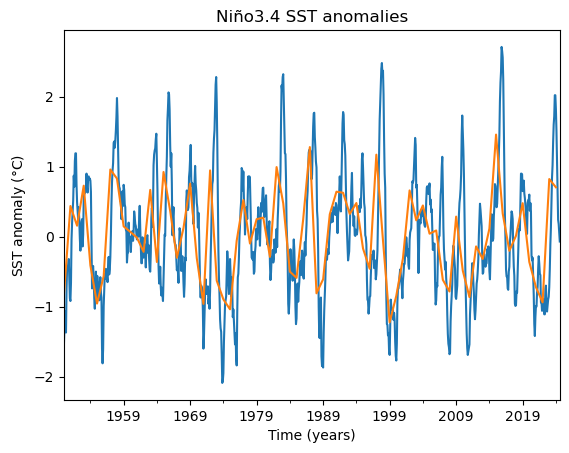

In [21]:
#Plot Niño3.4 SST anomalies using built-in plotting
line=df_n34['ANOM'].plot(title='Niño3.4 SST anomalies');
line.set_xlabel('Time (years)')
line.set_ylabel('SST anomaly ($\degree$C)')

#Add the annual means too, for fun
n34_ann.plot();

Now let's plot the anomalies using matplotlib. Notice how we don't need to create our own time axis like we had to in the first notebook when we were using raw numpy arrays! This is because we created a `DatetimeIndex` for our data.

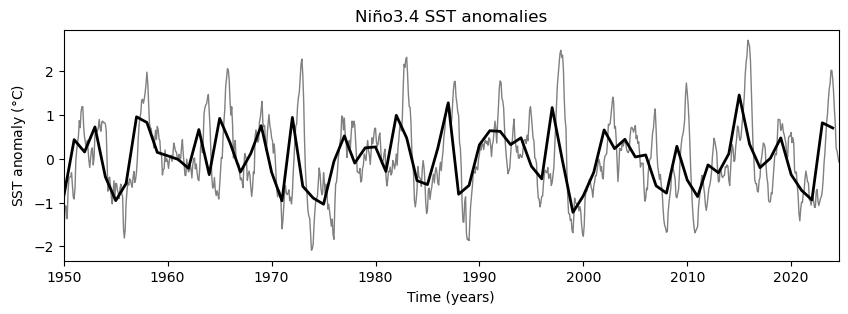

In [22]:
#Plot Niño3.4 SST anomalies using matplotlib
fig,ax=plt.subplots()
fig.set_size_inches(10,3)
ax.plot(df_n34['ANOM'],color='0.5',lw=1)
plt.title('Niño3.4 SST anomalies')
plt.xlabel('Time (years)')
plt.ylabel('SST anomaly ($\degree$C)');
ax.set_xlim(df_n34.index[0],df_n34.index[-1]) #OR ax.set_xlim([datetime.date(1950,1,1),datetime.date(2022,1,1)])

#plot the resampled data as well
ax.plot(n34_ann,color='k',lw=2)

Let's make a histogram of the monthly Niño3.4 SST anomalies:

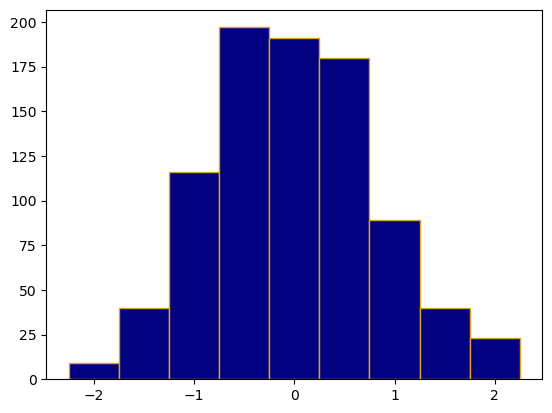

In [23]:
df_n34.ANOM.hist(bins=np.arange(-2.25,2.26,0.5),color='navy',ec='goldenrod',grid=False);
#bins here are the bin edges!
#color is the color of the bins
#ec is the edgecolor of the bins